Ссылка на данные: https://www.kaggle.com/fernandol/countries-of-the-world

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
name = 'countries of the world.csv'

In [3]:
wrld_table = pd.read_csv(name)
wrld_table.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
# Проверил наличие NaNов и проверил соответствие порядковых 
# индексов названиям столбцов

print(wrld_table.index.size)
wrld = wrld_table.dropna().reindex()
print(wrld.index.size)
pd.Series(data = wrld_table.columns)

227
179


0                                Country
1                                 Region
2                             Population
3                         Area (sq. mi.)
4             Pop. Density (per sq. mi.)
5           Coastline (coast/area ratio)
6                          Net migration
7     Infant mortality (per 1000 births)
8                     GDP ($ per capita)
9                           Literacy (%)
10                     Phones (per 1000)
11                            Arable (%)
12                             Crops (%)
13                             Other (%)
14                               Climate
15                             Birthrate
16                             Deathrate
17                           Agriculture
18                              Industry
19                               Service
dtype: object

### 1. Посчитать медианное значение площади стран Океании.

In [5]:
# Выбрал нужные для задачи колонки и переименовал для для удобства использования
# Проверил результирующую таблицу на наличие NaNов
# Проверил написание занчений в столбце Региона, там оказались лишние пробелы

wrld1 = wrld_table.iloc[:,[1, 3]].rename(columns = {'Area (sq. mi.)': 'Area'})
print(wrld1.isnull().values.any())
print(wrld1.index.size)
print(wrld1.Region.unique())
wrld1.head()

False
227
['ASIA (EX. NEAR EAST)         ' 'EASTERN EUROPE                     '
 'NORTHERN AFRICA                    '
 'OCEANIA                            '
 'WESTERN EUROPE                     '
 'SUB-SAHARAN AFRICA                 ' 'LATIN AMER. & CARIB    '
 'C.W. OF IND. STATES ' 'NEAR EAST                          '
 'NORTHERN AMERICA                   '
 'BALTICS                            ']


,Region,Area
0,ASIA (EX. NEAR EAST),647500
1,EASTERN EUROPE,28748
2,NORTHERN AFRICA,2381740
3,OCEANIA,199
4,WESTERN EUROPE,468


In [6]:
# Избавился от лишних пробелов в названиях Регионов

wrld1.Region = wrld1.Region.apply(lambda x: x.strip())
print(wrld1.Region.unique())

['ASIA (EX. NEAR EAST)' 'EASTERN EUROPE' 'NORTHERN AFRICA' 'OCEANIA'
 'WESTERN EUROPE' 'SUB-SAHARAN AFRICA' 'LATIN AMER. & CARIB'
 'C.W. OF IND. STATES' 'NEAR EAST' 'NORTHERN AMERICA' 'BALTICS']


In [7]:
# Поскольку в работе придется часто работать со столбцом Регионов, то 
# подправим исходную таблицу, чтобы не делать этого заново впоследствии

wrld_table.Region = wrld1.Region.apply(lambda x: x.strip())

In [8]:
# Выделил все появления Океании в новой таблице и занес в переменную значение 
# медианы по площадям стран Океании

oceania_median_area = wrld1.loc[wrld1.Region == 'OCEANIA'].Area.median()
oceania_median_area

811.0

### 2. Определить 10 стран с наименьшим уровнем грамотности.

In [9]:
# Выбрал нужные для задачи колонки и переименовал
# Опять же, проверил данные на наличие пустых значений и избавился от них
# Определил тип данных в каждом столбце, в столбце Грамотность оказались не
# численные значения с плавающей запятой, а строка, причем для конвертации
# этих данных в тип float необходимо заменить "," на "."

wrld2 = wrld_table.iloc[:,[0, 9]].rename(columns = {'Literacy (%)': 'Literacy'})
print(wrld2)
print(wrld2.isnull().values.any())
wrld2 = wrld2.dropna().reindex()
print(wrld2.index.size)
wrld2.dtypes
wrld2.Literacy

             Country Literacy
0       Afghanistan      36,0
1           Albania      86,5
2           Algeria      70,0
3    American Samoa      97,0
4           Andorra     100,0
..               ...      ...
222       West Bank       NaN
223  Western Sahara       NaN
224           Yemen      50,2
225          Zambia      80,6
226        Zimbabwe      90,7

[227 rows x 2 columns]
True
209


0       36,0
1       86,5
2       70,0
3       97,0
4      100,0
       ...  
219     90,3
221     50,0
224     50,2
225     80,6
226     90,7
Name: Literacy, Length: 209, dtype: object

In [10]:
# На всякий случай создал копию таблицы 
# Применил к каждой строке столбца Грамотность лямбда-функцию для замены запятой
# на точку и сменил тип данных в этом же столбце

wrld2_fixed = wrld2.copy()
wrld2_fixed.Literacy = wrld2.Literacy.apply(lambda x: x.replace(',','.')).astype('float64')
wrld2_fixed

,Country,Literacy
0,Afghanistan,36.0
1,Albania,86.5
2,Algeria,70.0
3,American Samoa,97.0
4,Andorra,100.0
...,...,...
219,Vietnam,90.3
221,Wallis and Futuna,50.0
224,Yemen,50.2
225,Zambia,80.6


In [11]:
# Отсортировал по значениям Грамотность результирующую таблицу и посмотрел, что
# выходит

wrld2_fixed.sort_values(by = 'Literacy').head(10)

,Country,Literacy
151,Niger,17.6
31,Burkina Faso,26.6
183,Sierra Leone,31.4
86,Guinea,35.9
0,Afghanistan,36.0
188,Somalia,37.8
73,"Gambia, The",40.1
180,Senegal,40.2
97,Iraq,40.4
21,Benin,40.9


In [12]:
# Сделал то же самое с ограничением в первые 10 значением и сохранил серию 
# только с наименованиями стран в переменную

low_literacy_countries = wrld2_fixed.sort_values(by = 'Literacy') \
.iloc[0:10, 0].reset_index(drop = True)
low_literacy_countries

0           Niger 
1    Burkina Faso 
2    Sierra Leone 
3          Guinea 
4     Afghanistan 
5         Somalia 
6     Gambia, The 
7         Senegal 
8            Iraq 
9           Benin 
Name: Country, dtype: object

### 3. Построить график суммарной численности населения в разбивке по регионам.

In [13]:
# Выбрал нужное для задачи
# Проверил результирующую таблицу на наличие NaNов (их не оказалось)
# Определил тип данных в каждом столбце (все оказалось подходящим)

wrld3 = wrld_table.iloc[:,[1, 2]].copy()
print(wrld3)
print(wrld3.isnull().values.any())
print(wrld3.index.size)
wrld3.dtypes

                   Region  Population
0    ASIA (EX. NEAR EAST)    31056997
1          EASTERN EUROPE     3581655
2         NORTHERN AFRICA    32930091
3                 OCEANIA       57794
4          WESTERN EUROPE       71201
..                    ...         ...
222             NEAR EAST     2460492
223       NORTHERN AFRICA      273008
224             NEAR EAST    21456188
225    SUB-SAHARAN AFRICA    11502010
226    SUB-SAHARAN AFRICA    12236805

[227 rows x 2 columns]
False
227


Region        object
Population     int64
dtype: object

In [14]:
# Сгруппировал данные по региону с суммированием численности по каждой группе

region_popul = wrld3.groupby('Region').Population.sum()
region_popul

Region
ASIA (EX. NEAR EAST)    3687982236
BALTICS                    7184974
C.W. OF IND. STATES      280081548
EASTERN EUROPE           119914717
LATIN AMER. & CARIB      561824599
NEAR EAST                195068377
NORTHERN AFRICA          161407133
NORTHERN AMERICA         331672307
OCEANIA                   33131662
SUB-SAHARAN AFRICA       749437000
WESTERN EUROPE           396339998
Name: Population, dtype: int64

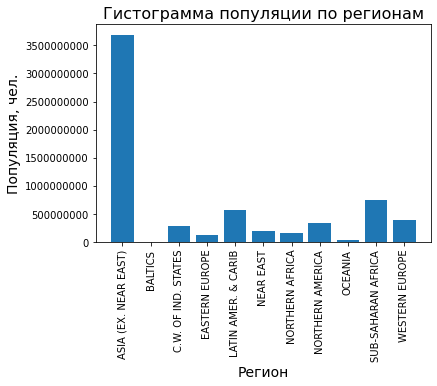

In [15]:
# Отобразил график гистограммы популяции по регионам 

plt.bar(region_popul.index, region_popul)
plt.title('Гистограмма популяции по регионам', fontsize = 16)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation = 90)
plt.xlabel('Регион', fontsize = 14)
plt.ylabel('Популяция, чел.', fontsize = 14)
plt.show()

### 4. На основании данных, ответить на вопрос, в каком регионе наблюдается наибольший миграционный отток населения.

In [16]:
# Так же выбрал нужное для задачи колонки и переименовал
# Опять же, проверил данные на наличие пустых значений и избавился
# Определил тип данных в каждом столбце, ситуация оказалось такой же, как и
# во втором задании этого раздела

wrld4 = wrld_table.iloc[:,[1, 6]].copy().rename(columns = {'Net migration': 'Migration'})
print(wrld4)
print(wrld4.isnull().values.any())
wrld4 = wrld4.dropna().reindex()
print(wrld4.index.size)
wrld4.dtypes

                   Region Migration
0    ASIA (EX. NEAR EAST)     23,06
1          EASTERN EUROPE     -4,93
2         NORTHERN AFRICA     -0,39
3                 OCEANIA    -20,71
4          WESTERN EUROPE       6,6
..                    ...       ...
222             NEAR EAST      2,98
223       NORTHERN AFRICA       NaN
224             NEAR EAST         0
225    SUB-SAHARAN AFRICA         0
226    SUB-SAHARAN AFRICA         0

[227 rows x 2 columns]
True
224


Region       object
Migration    object
dtype: object

In [17]:
# Cоздал копию таблицы 
# Заменил запятые на точки в значениях столбца Миграций и сменил тип данных

wrld4_fixed = wrld4.copy()
wrld4_fixed.Migration = wrld4.Migration.apply(lambda x: x.replace(',','.')).astype('float64')
wrld4_fixed

,Region,Migration
0,ASIA (EX. NEAR EAST),23.06
1,EASTERN EUROPE,-4.93
2,NORTHERN AFRICA,-0.39
3,OCEANIA,-20.71
4,WESTERN EUROPE,6.60
...,...,...
220,LATIN AMER. & CARIB,-8.94
222,NEAR EAST,2.98
224,NEAR EAST,0.00
225,SUB-SAHARAN AFRICA,0.00


In [18]:
# Сгруппировал данные по Регионам с добавлением нового индекса в 
# результирующую таблицу и суммированием значений показателей миграций по
# соответствующим регионам
# Обновил счетчик индекса и занес в migrations

migrations_df = wrld4_fixed.groupby('Region', as_index = False).Migration \
.sum().sort_values(by = 'Migration').reset_index(drop = True)
print(migrations_df.head())

# По данным таблицы migrations можно сказать, что самый большой миграционный
# отток наблюдается в сообществе стран Латинской Америки и Карибского бассейна

# Занес первую строку результирующей таблицы в новую переменную

migrations = migrations_df.iloc[0,:]
migrations


                Region  Migration
0  LATIN AMER. & CARIB     -67.25
1              OCEANIA     -39.15
2  C.W. OF IND. STATES     -24.40
3   SUB-SAHARAN AFRICA     -17.09
4       EASTERN EUROPE      -7.77


Region       LATIN AMER. & CARIB
Migration                 -67.25
Name: 0, dtype: object